In [21]:
import numpy as np
import matplotlib.pyplot as plt

# The next line indicates to matplotlib to show the plots inline in the notebook
%matplotlib inline

# Programming assignment

You have program a series of functions in order to generate a protein translation table. A protein is created from a sequence of nucleic acids codified in the messenger RNA (mRNA). This mRNA is read by the ribosome three bases at a time (called codons) to add one amino acid to the protein. In total there are $4^3=64$ different codons that correspond to the possible combinations of three bases.  Each codon codifies a single amino acid. The mRNA has one start codon that always codifies M and an end codon that signals the end of the protein.

The objective of this assignment is to generate this translation table. To do so you will have to:

+ Read the genome of a species from a FASTA file
+ Read the annotation file for that genome to extract the location in the genome of the Coding Sequences (CDS) for each protein
+ Extract the mRNAs from the genome that codifies each protein using its location 
+ Read the proteins from a FASTA file
+ Generate the translation table using pairs of mRNA and protein


In the following you will find the template of the functions to use and some other interesting execises 

# File parsing 

Implement the function below to parse a fasta file. Find an example of a fasta format file here:
***
<pre>>NC_000907.1:1073118-1073456 Haemophilus influenzae Rd KW20 chromoso
ATGAAAACATTATTCACTTCGGTTGTATTGTGTGGTGCGCTGGTTGTTTCTTCGTCTTTTGCTGAGGAAA
AAGCGACAGANCAAACCGCTCAATCTGTTGTGACAACTCAAGCTGAAGCTCAAGTAGCACCAGCCGTAGT
GAGCGATAAATTGAATATCAACACAGCAACTGCCAGTGAAATTCAAAAATCCTTAACTGGCATTGGTGCG
AAAAAAGCGGAAGCTATTGTGCAATATCGTGAAAAACACGGTAATTTTKCTAATGCAGAACAGCTTTTAG
AAGTACAAGGAATTGGCAAAGCAACACTAGAGAAAAATCGTGATCGTATAATCTTTTAA
</pre>
***


#### Read FASTA

In [22]:
def readFasta(file):
    with open(file,'r') as fasta_file:
        fasta_dict = {}
        name = ''
        for line in fasta_file:
            if line[0] == ">":
                name = line[1:].split()[0]
                fasta_dict[name] = ''
            else:
                fasta_dict[name] += line.strip()
    return fasta_dict

In [23]:
# Cell for checking if readFasta is working
seqs = readFasta("phix174/phix.fa")
#print(seqs['gi|216019|gb|J02482.1|PX1CG'])
# Check that the number of sequences is one
assert(len(seqs)==1)
# Check that the length of the sequences is correct
assert(len(seqs['gi|216019|gb|J02482.1|PX1CG'])==5386)

print("All tests Ok")

All tests Ok


#### Some statistics

In [24]:
def countBases(seq, bases = []):
    """ Counts the number of occurrences of each base in the sequence seq
        There are two return values: the list of bases and the list of counts
    """
    counts = []
    if not bases: # If there are not bases provided
        for i in seq:
            if i not in bases:
                bases.append(i) # We will use all bases in the sequence
    for b in bases: # Iterating every base
        base_count = 0 # Variable to count 
        for i in seq: # Iterating the sequence
            if i == b:
                base_count += 1 # Counting matches
        counts.append(base_count) # Adding the count to the list
    return bases, counts

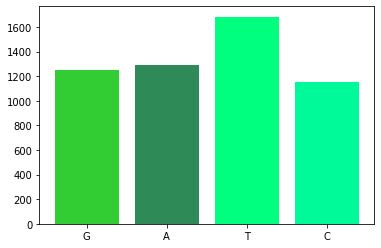

In [25]:
# Use matplotlib to show the histogram of bases for phiX174
frequencies = countBases(readFasta("phix174/phix.fa")['gi|216019|gb|J02482.1|PX1CG'])
y = frequencies[1]
x = frequencies[0]
_ = plt.bar(x, y, color = ('limegreen', 'seagreen', 'springgreen', 'mediumspringgreen'))

In [26]:
def GCContent(seq):
    """ Computes the percentage of GC content of a sequence. 
        Note that N should be ignored """
    GC_count = sum(countBases(seq, ['G', 'C'])[1])
    AT_count = sum(countBases(seq, ['A', 'T'])[1])
    return GC_count/(GC_count+AT_count)

In [27]:
# Check that the GC content is correct
seqs = readFasta("phix174/phix.fa")
assert(GCContent(seqs['gi|216019|gb|J02482.1|PX1CG'])==0.44764203490531007)
# Check that the GC content is correct
seqs = readFasta("plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa")
assert(GCContent(seqs['NC_004325.1'])==0.20545724181242733)

print("All tests Ok")

All tests Ok


In [28]:
files = ["haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna",
         "phix174/phix.fa",
         "plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa",]

# Uncomment the following and comment the above if your computer can run it in a reasonable time

#files = ["haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna",
#         "phix174/phix.fa",
#         "plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa",
#         "arabidopsis_thaliana/GCF_000001735.3_TAIR10_genomic.fna",
#         "homo_sapiens/homo_sapiens_chr21.fasta"]

gcs = []
species = []
for file in files:
    seqs = readFasta(file)
    # Count only the first sequence
    keys = list(seqs.keys())
    gcs.append(GCContent(seqs[keys[0]]))
    species.append(keys[0])
    
print(gcs)

[0.38150285542859297, 0.44764203490531007, 0.20545724181242733]


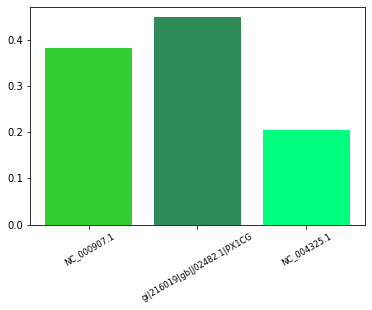

In [29]:
# Use matplotlib to show the GC content of the different species with a bar plot
_ = plt.bar(species, gcs, color = ('limegreen', 'seagreen', 'springgreen', 'mediumspringgreen'))
diagonal = plt.xticks(size = 'small', rotation = 30)

#### Read FASTQ

In [4]:
def readFastq(file):
    """ Read a FASTQ format file """
    reads = []
    quals = []
    with open(file, 'r') as f:
        f = f.readlines()
    for i in range(0,len(f)-1,4):
        reads.append(f[i+1].strip())
        quals.append([ord(qual) - 33 for qual in f[i+3].strip()])
    return reads, quals

Wall time: 63 ms


5.011872336272714e-10

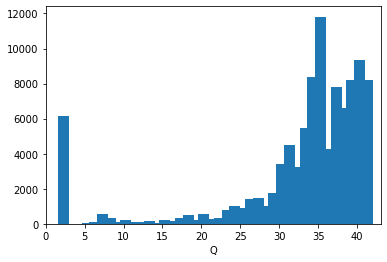

In [31]:
import math

# Use matplotlib to show the a histogram of Qs
%time rr, qq = readFastq('phix174/SRR835775_1.first1000.fastq')
#%time rr, qq = readFastq('sintetico/sample_01.fasta.fastq')

q =np.concatenate(qq,axis=0)
plt.xlabel('Q')
plt.xlim((0,43))
hh, bb = np.histogram(q,range(1,50))
plt.bar(np.arange(1,49),hh)
h = plt.hist(q,range(50))

math.pow(10,-(ord('~')-33)/10)

### Spark exercise (only this cell)

In [ ]:
# Implement a sequence of spark transformations to read a fasta file 
#   and to compute the number of occurrences of each base. 
# 
# You can use count countBases inside a tranformation instead of a 
# lambda

In [17]:
fasta_rdd = sc.textFile('phix174/phix.fa')

lines_rdd = fasta_rdd.filter(lambda line: line[0] != ">")

ones_per_line_rdd = lines_rdd.map(lambda line: [(nt, 1) for nt in line])

ones_rdd = ones_per_line_rdd.flatMap(lambda x: x)

count_bases_rdd = ones_rdd.reduceByKey(lambda f1, f2: f1 + f2)

print(count_bases_rdd.collect())

[(u'A', 1291), (u'C', 1157), (u'G', 1254), (u'T', 1684)]


# Obtaining traslation tables

In [32]:
def complementary(gen):
    """ From a sequence of nucleotides return the inverse complementary
          e.g. GAACCT should return AGGTTC
          Hint: Use a dictionary for the translations
        """
    trans_dict = {"A":"T","C":"G","G":"C","T":"A","N":"N","R":"Y","Y":"R","S":"S","W":"W","K":"M","M":"K","B":"V","V":"B","D":"H","H":"D"}
    return "".join([trans_dict[nt] for nt in gen[::-1]])

In [33]:
# Tests
assert(complementary('G')=='C')
assert(complementary('AT')=='AT')
assert(complementary('GC')=='GC')
assert(complementary('GATACA')=='TGTATC')
# If you added all possible combination of bases uncomment the 
# following line to check
assert(complementary('GATACASWKMYRHDVBN')=='NVBHDYRKMWSTGTATC')

print('All tests OK!')

All tests OK!


In [34]:
def extractProteinId(attribs):
    """ Extract the protein_id from the complete string of the attributes 
        field of the gff """
    protein_id = attribs[attribs.find("protein_id=")+len("protein_id="):]
    i = protein_id.find(";")
    if i>=0:
        protein_id = protein_id[:i]
        
    return protein_id
    
def extractCDSFromGFF(gff_file):
    """ This function extract the regions information from a gff file for all CDSs.
        
        This function returns a dictionary with the protein_id being the keys and 
        the values in a list with the sequence_id and tuples with (start, end, strand, frame)
        
        Note that a CDS might spread over multiple lines. For each line you should include 
        one tuple.
        
        Check the tests in the next cell for reference
        
    """
    cdss = {}
    with open(gff_file, 'r') as f:
        f = f.readlines()
    for line in f:
        if line[0] != "#":
            fields = line.split('\t')
            if fields[2] == "CDS" and extractProteinId(fields[8]) not in cdss.keys():
                cdss[extractProteinId(fields[8])] = [fields[0], (int(fields[3]), int(fields[4]), fields[6], int(fields[7]))]
            elif fields[2] == "CDS" and extractProteinId(fields[8]) in cdss.keys():
                cdss[extractProteinId(fields[8])].append((int(fields[3]),int(fields[4]), fields[6], int(fields[7])))
    return cdss

In [35]:
# Tests
assert(extractCDSFromGFF('haemophilus_influenzae/test1.gff')=={'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)]})
assert(extractCDSFromGFF('haemophilus_influenzae/test2.gff')== {'NP_438174.1': ['NC_000907.1',  (2, 1021, '+', 0)],
                                                  'NP_438175.1': ['NC_000907.1',  (1190, 3013, '+', 0)],
                                                  'NP_438176.1': ['NC_000907.1', (3050, 3838, '-', 0)]})
assert(extractCDSFromGFF('haemophilus_influenzae/test3.gff')=={'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)],
                 'NP_438271.2': ['NC_000907.1', (104277, 104318, '+', 0), (104318, 105274, '+',  0)]})
print('All test are OK!')

All test are OK!


In [36]:
def obtainTranslationTable(cds, protein):
    """ Creates a translation dictionary from the protein and DNA sequence.
        The function returns:
            1- A dictionary with the translation table where the codons are the
               keys of the dictionary and the amino acids the values.
            2- The start codon as a string
            
        Note 1: The sequence cds includes start and end codons. 
        Note 2: First codon always codifies M that is also included in the protein.
        Note 3: End codon do not codify an a aminoacid and should be included in the
                dictionary as *.
                
        Example: (Spaces added in seqeunces for readability) 
          cds     = GTG TTT TTG GTG TGG TGA
          protein = M   F   L   V   W
          
          should return
            tranlation dictionary = {'TTT':'F', 'TTG':'L', 'GTG':'V', 'TGG':'W', 'TGA':'*'}
            start codon = 'GTG'
        """
    start_codon = cds[:3]
    trans_table = {}
    codons = []
    while len(cds) != 0:
        codons.append(cds[:3])
        cds = cds[3:]
    for c in codons[:-1]:
        trans_table[c] = protein[0]
        protein = protein[1:]
    trans_table[codons[-1]] = '*'
    return trans_table, start_codon

In [37]:
translation_dictionary, start_codon = obtainTranslationTable('GTGTTTTTGGTGTGGTGA','MFLVW')
assert(translation_dictionary=={'TTT':'F', 'TTG':'L', 'GTG':'V', 'TGG':'W', 'TGA':'*'})
assert(start_codon == 'GTG')

print('All test OK!')

All test OK!


In [38]:
def compose_mRNA(cromosome, cds):
    """Returns the mRNA from the complete sequence of DNA and the locations of the CDS. 
        Parameters:
            -cromosome: a string with the whole cromosome
            -cds: a list containing tuples of (start, end, strand, phase) """
    mrna = ''
    for location in cds:
        if location[2] == '-':
            mrna += complementary(cromosome[location[0]-1:location[1]])
        else:
            mrna += cromosome[location[0]-1:location[1]]
    return mrna

In [39]:
cod = 'GTGTTTTTGGTGTGGTGA'

assert(compose_mRNA(cod,[(1,len(cod),'+',0)])==cod)
assert(compose_mRNA(cod,[(1,len(cod),'-',0)])==complementary(cod))
assert(compose_mRNA("GGGGGGGGGG"+cod+"GGGGGG",[(11,10+len(cod),'+',0)])==cod)
assert(compose_mRNA("GGGGGGGGGG"+cod+"GGGGGG",[(11,10+len(cod),'-',0)])==complementary(cod))
assert(compose_mRNA("GGGGGGGGGG"+cod[:9]+"GGGGGG"+cod[9:],[(11,19,'+',0),(26,34,'+',0)])==cod)
assert(compose_mRNA("GGGGGGGGGG"+cod[:9]+"GGGGGG"+cod[9:],[(26,34,'-',0),(11,19,'-',0)])==complementary(cod))

print("All tests are OK!")

All tests are OK!


### Cell to compute the translation tables

In [40]:
def cleanTransTable(tt):
    # Remove entries that codify 'X' (unknown)
    tt = {k:tt[k] for k in tt if tt[k]!='X'}
    # Remove entries that are not GCAT only
    tt = {k:tt[k] for k in tt if k.count('G')+k.count('C')+k.count('A')+k.count('T') == 3}
    
    return tt

# Read data
genome   = readFasta('haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna')
cdss     = extractCDSFromGFF('haemophilus_influenzae/test4.gff')
proteins = readFasta('haemophilus_influenzae/GCF_000027305.1_ASM2730v1_protein.faa')

# Init trans table and start codons
translation_table = {}
start_codons = set()

# Loop over all mRNA found
for protein_id in cdss:
    cds    = cdss[protein_id]
    seq_id = cds[0]
    
    mRNA   = compose_mRNA(genome[seq_id], cds[1:])
    tt, sc = obtainTranslationTable(mRNA, proteins[protein_id])
    
    translation_table.update(tt)
    start_codons.add(sc)

# Remove spurious entries from the result
translation_table = cleanTransTable(translation_table)

#Print result
print("List of start codons: ", start_codons)
print("There are {0} entries in the tranlation table.".format(len(translation_table)))
print("Entries:")

for i,k in enumerate(sorted(translation_table.keys())):
    if i%8==0:
        print()
    print(k + "->" + translation_table[k], end='    ')
    


List of start codons:  {'ATG', 'TTG'}
There are 64 entries in the tranlation table.
Entries:

AAA->K    AAC->N    AAG->K    AAT->N    ACA->T    ACC->T    ACG->T    ACT->T    
AGA->R    AGC->S    AGG->R    AGT->S    ATA->I    ATC->I    ATG->M    ATT->I    
CAA->Q    CAC->H    CAG->Q    CAT->H    CCA->P    CCC->P    CCG->P    CCT->P    
CGA->R    CGC->R    CGG->R    CGT->R    CTA->L    CTC->L    CTG->L    CTT->L    
GAA->E    GAC->D    GAG->E    GAT->D    GCA->A    GCC->A    GCG->A    GCT->A    
GGA->G    GGC->G    GGG->G    GGT->G    GTA->V    GTC->V    GTG->V    GTT->V    
TAA->*    TAC->Y    TAG->*    TAT->Y    TCA->S    TCC->S    TCG->S    TCT->S    
TGA->*    TGC->C    TGG->W    TGT->C    TTA->L    TTC->F    TTG->L    TTT->F    